<a href="https://colab.research.google.com/github/Mohamednowfil/-Jarurat-Care-NGO/blob/main/Home_decor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

# Load Excel workbook (replace 'your_file.xlsx' with actual filename)
df = pd.read_excel("/content/House Decour.xlsx", sheet_name="Year from 2010-2011")  # Change sheet name if needed

# Check first few rows
print(df.head())

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning and Processing
df.rename(columns={"InvoiceDate.1": "InvoiceDate", "Campany": "Company"}, inplace=True)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Total Sales'] = df['Quantity'] * df['Price']

# Fill missing values
df.fillna({'Rating': df['Rating'].mean(), 'Review': 'No Review'}, inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)


   Invoice  Quantity InvoiceDate.1  Price  Customer ID         Country  \
0      142         1    2010-12-01  27.50        14527  United Kingdom   
1      155         1    2010-12-01   4.65        15311  United Kingdom   
2      236        12    2010-12-01   1.65        17548  United Kingdom   
3      237        24    2010-12-01   0.29        17548  United Kingdom   
4      238        24    2010-12-01   0.29        17548  United Kingdom   

            Campany   Categories  Rating     Review  
0  Ashley Furniture   Home Decor     4.8  Very Good  
1    Crate & Barrel  Kitchenware     0.9   Negative  
2           Wayfair     Lighting     0.8   Negative  
3           Wayfair      Bedding     4.3   Positive  
4              IKEA      Bedding     0.2   Negative  


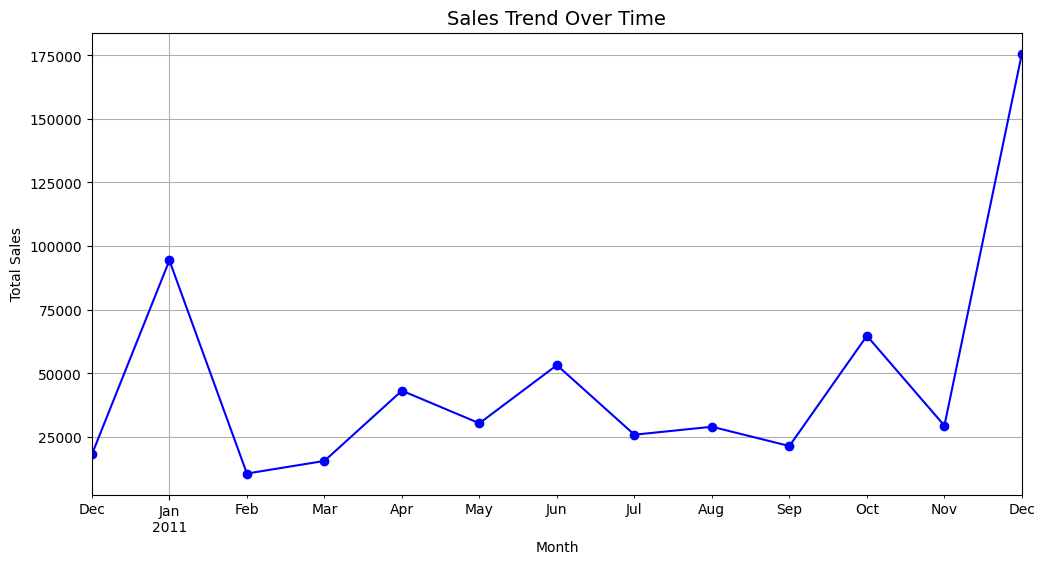

In [7]:

# ---- Analysis and Visualization ---- #

# 1. Sales Trends Over Time (Line Chart)
sales_trend = df.groupby(df['InvoiceDate'].dt.to_period("M"))['Total Sales'].sum()

plt.figure(figsize=(12, 6))
sales_trend.plot(kind='line', marker='o', color='b')
plt.title("Sales Trend Over Time", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()


<ipython-input-8-d5d480028249>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette="viridis")


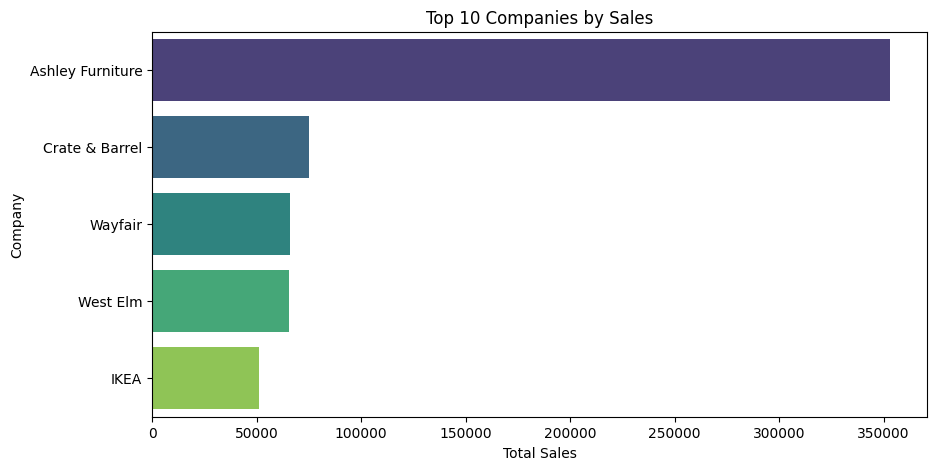

In [8]:

# 2. Top Companies by Sales (Bar Chart)
top_companies = df.groupby("Company")["Total Sales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_companies.values, y=top_companies.index, palette="viridis")
plt.title("Top 10 Companies by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Company")
plt.show()


<ipython-input-9-f8b69a714d66>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="magma")


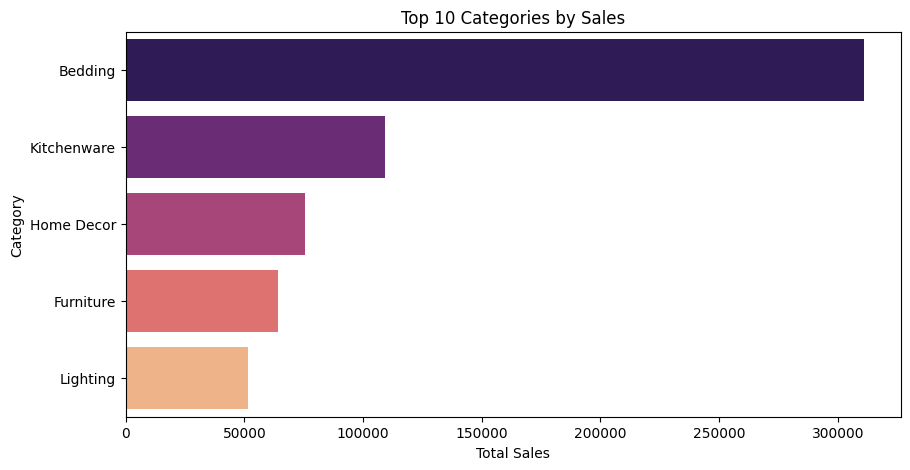

In [9]:

# 3. Top Categories by Sales (Bar Chart)
top_categories = df.groupby("Categories")["Total Sales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="magma")
plt.title("Top 10 Categories by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Category")
plt.show()


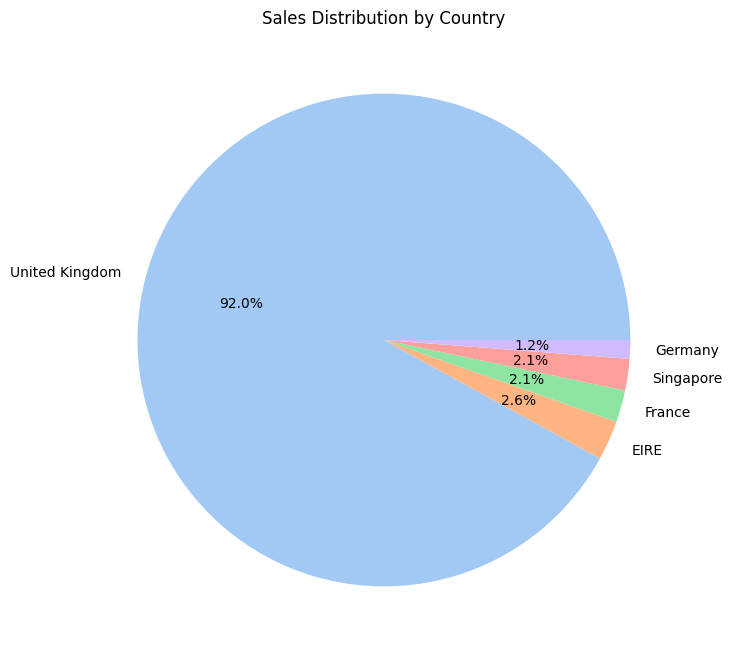

In [10]:

# 4. Customer Distribution by Country (Pie Chart)
country_sales = df.groupby("Country")["Total Sales"].sum().nlargest(5)

plt.figure(figsize=(8, 8))
plt.pie(country_sales, labels=country_sales.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Sales Distribution by Country")
plt.show()


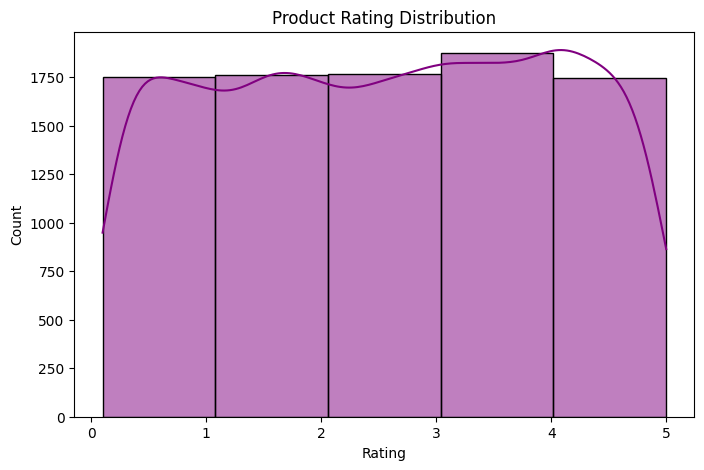

In [11]:

# 5. Rating Distribution (Histogram)
plt.figure(figsize=(8, 5))
sns.histplot(df["Rating"], bins=5, kde=True, color="purple")
plt.title("Product Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


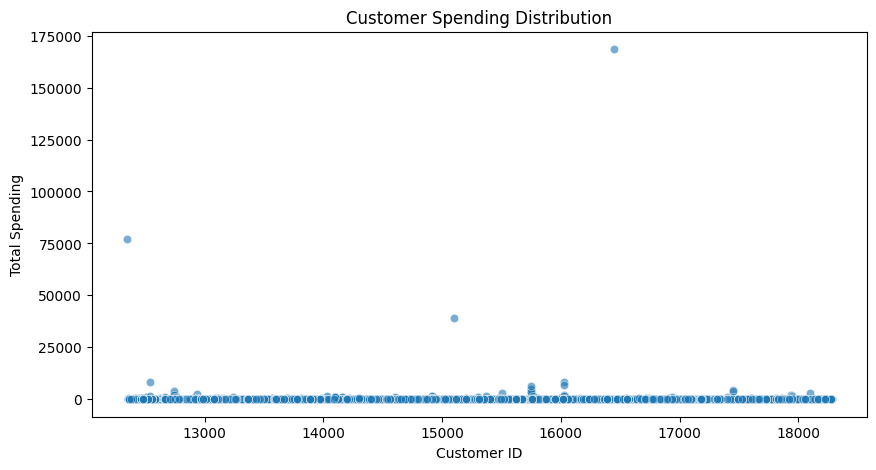

In [12]:

# 6. Customer Spending Pattern (Scatter Plot)
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="Customer ID", y="Total Sales", alpha=0.6)
plt.title("Customer Spending Distribution")
plt.xlabel("Customer ID")
plt.ylabel("Total Spending")
plt.show()


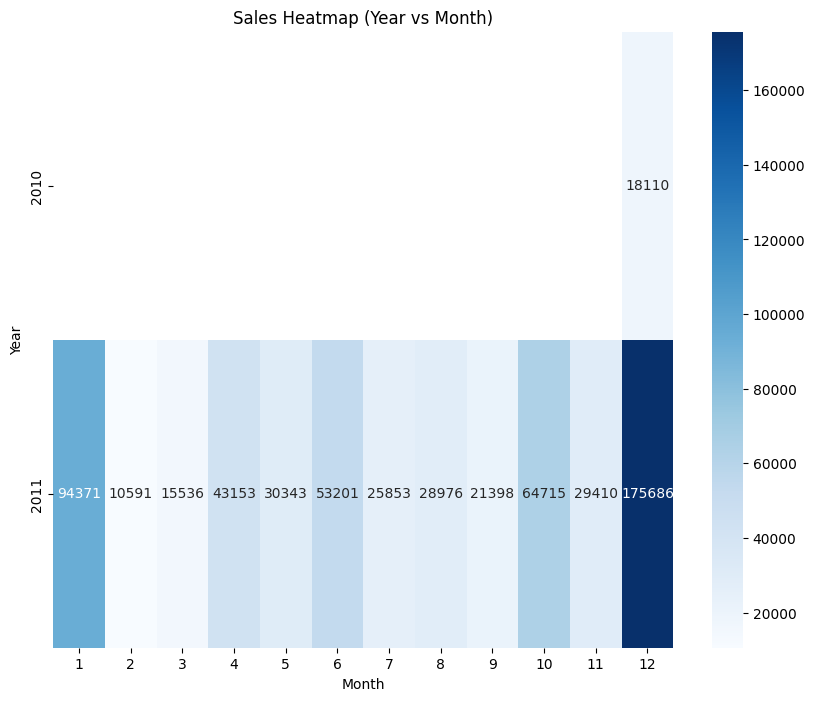

In [13]:

# 7. Sales Heatmap (Optional)
sales_heatmap = df.pivot_table(values="Total Sales", index=df['InvoiceDate'].dt.year,
                               columns=df['InvoiceDate'].dt.month, aggfunc="sum")

plt.figure(figsize=(10, 8))
sns.heatmap(sales_heatmap, annot=True, fmt=".0f", cmap="Blues", cbar=True)
plt.title("Sales Heatmap (Year vs Month)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()
